In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [4]:
from access_biology_data import meta, relations, annotation, properties
from access_literature_data import medline
from access_science_shared import standardizer

import sys
sys.path.append('./../src/')
from aging_tools import inout, export, calculators
from access_aging_data import chaperome, earlier_studies, sequencing


In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

In [6]:
save_images = True

/Users/tstoeger/anaconda3/lib/python3.7/site-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


10090 0.0036670127617623306
anti_longevity    335
pro_longevity     219
Name: influence, dtype: int64
9606 0.007756594764200823
anti_longevity    455
pro_longevity     294
Name: influence, dtype: int64


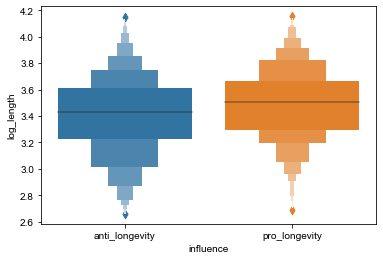

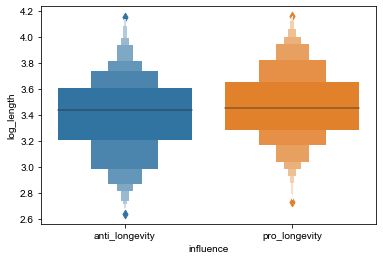

In [7]:
for taxon_id in [10090, 9606]:

    ref_genes = standardizer.reference_genes(
        taxon_id, 
        'orp')  # only consider supported protein coding-genes

    pr = properties.genbank_validated_rna(taxon_id)[
        ['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']].rename(columns={
        'Genbank_validated_RNA: full_SumACGT': 'length'
    })
    pr.loc[:, 'log_length'] = np.log10(pr['length'])
    pr = pr[pr['gene_ncbi'].isin(ref_genes)]
    pr.loc[:, 'rank'] = pr['length'].rank(pct=True)

    hagr = earlier_studies.hagr_mapped_summary(taxon_id)

    pr['diff'] = (pr['rank'] - 0.5).abs()

    m = pd.merge(
        pr, 
        hagr[hagr['influence'].isin(
        [
            'anti_longevity',
            'pro_longevity'
        ]

        )].drop_duplicates(),
        how='inner'

    )

    plt.figure()
    sns.boxenplot(
        x='influence', 
        y='log_length', 
        data=m)


    if save_images:
        export.export_image(
            '200823_hagr_absolute_in_nucleotides/{}.pdf'.format(int(taxon_id))
        )

    from scipy.stats import mannwhitneyu

    print(taxon_id, mannwhitneyu(
        m[m['influence']=='anti_longevity']['rank'],
        m[m['influence']=='pro_longevity']['rank'],
        alternative='two-sided'
    )[1])

    print(m['influence'].value_counts())